<a href="https://colab.research.google.com/github/pajonnakuti/pyDataviz/blob/main/Read_H5_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keys: ['science_data']
Dataset names within 'science_data': ['Cost_function', 'Cost_function_selection', 'Latitude', 'Longitude', 'Model_direction', 'Model_speed', 'Number_of_ambiguities', 'Rain_Corrected_Wind_Speed', 'Row_index', 'WVC_quality_flag', 'WVC_row_time', 'WVC_selection', 'Wind_direction', 'Wind_direction_selection', 'Wind_speed', 'Wind_speed_selection']
Processed Wind Speed data shape: (1720, 144)
Processed Wind Speed data type: float64


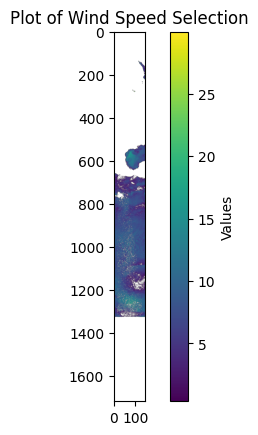

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# === Open HDF5 file ===
filename = "/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00543_00544_NS_12km_2023-002T19-22-23_v1.0.0.h5"
with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys:", list(f.keys()))

    # Choose the science_data group
    science_group = f['science_data']

    # List all datasets within the science_data group
    dataset_names = list(science_group.keys())
    print("Dataset names within 'science_data':", dataset_names)

    # Read specific datasets and apply scaling/filtering based on provided snippet
    lon_in = science_group['Longitude'][:] * 0.01
    lat_in = science_group['Latitude'][:] * 0.01
    ws_in = science_group['Wind_speed_selection'][:] * 0.01
    wd_in = science_group['Wind_direction_selection'][:] * 0.01
    qc = science_group['WVC_quality_flag'][:]

    # Scale and filter data
    lon_in[lon_in >= 655.3500] = np.nan
    lat_in[lat_in >= 327.6700] = np.nan
    lon_in = lon_in - 180
    ws_in[ws_in == 327.67] = np.nan # Corrected threshold based on scaled data
    ws_in[qc != 1] = np.nan

    # For plotting, let's use the processed wind speed data
    data = ws_in

    print("Processed Wind Speed data shape:", data.shape)
    print("Processed Wind Speed data type:", data.dtype)


# === Plot ===
# Select a 2D slice for plotting (e.g., the first channel)
# Assuming ws_in is still 3D (time, row, ambig) based on previous output,
# we'll plot the first channel again.
if data.ndim == 3:
  plt.imshow(data[:, :, 0], cmap="viridis")
  plt.colorbar(label="Values")
  plt.title(f"Plot of Wind Speed Selection (First Channel)")
elif data.ndim == 2:
  plt.imshow(data, cmap="viridis")
  plt.colorbar(label="Values")
  plt.title(f"Plot of Wind Speed Selection")
else:
  print("Data is not 2D or 3D, cannot plot with imshow.")

plt.show()

# Task
Read all HDF5 files in the directory "/content/drive/MyDrive/PyDataViz/" for a single day, extract and process the 'Longitude', 'Latitude', and 'Wind_speed_selection' data, and plot the wind speed on a geographical map.

## Define parameters

### Subtask:
Set the year and day of the year for which you want to process the data.


**Reasoning**:
The subtask requires setting the year and day variables, which can be done in a single code block.



In [12]:
year = 2023
day = 2

## List files

### Subtask:
Get a list of all HDF5 files in the specified directory that correspond to the selected day.


**Reasoning**:
Get a list of all HDF5 files in the specified directory that correspond to the selected day by importing necessary modules, defining the directory path, constructing a search pattern, and using `glob.glob()` to find the files.



In [13]:
import os
import glob

# Define the directory path
directory_path = "/content/drive/MyDrive/PyDataViz/"

# Construct a search pattern for the specified year and day
search_pattern = f"E06SCTL2B{year}{day:03d}*_v1.0.0.h5"

# Get a list of all matching files
file_list = glob.glob(os.path.join(directory_path, search_pattern))

# Print the list of file paths
print("Found files:", file_list)

Found files: ['/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00542_00543_SN_12km_2023-002T19-20-58_v1.0.0.h5', '/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00542_00543_SN_12km_2023-002T19-30-33_v1.0.0.h5', '/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00543_00544_NS_12km_2023-002T19-22-23_v1.0.0.h5', '/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00543_00544_SN_12km_2023-002T21-00-07_v1.0.0.h5', '/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00544_00545_NS_12km_2023-002T21-09-08_v1.0.0.h5', '/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00544_00545_SN_12km_2023-002T22-37-52_v1.0.0.h5', '/content/drive/MyDrive/PyDataViz/E06SCTL2B2023002_00545_00546_NS_12km_2023-002T22-46-36_v1.0.0.h5']


## Initialize data storage

### Subtask:
Create empty lists or arrays to store the longitude, latitude, and wind speed data read from all files for the day.


**Reasoning**:
Initialize empty lists to store longitude, latitude, and wind speed data from all files.



In [14]:
all_lon = []
all_lat = []
all_ws = []

## Process each file

### Subtask:
Loop through the list of files for the day. For each file:
    - Open the HDF5 file.
    - Read the 'Longitude', 'Latitude', 'Wind_speed_selection', and 'WVC_quality_flag' datasets.
    - Apply the necessary scaling and filtering (as done in the previous steps) to the read data.
    - Append the processed longitude, latitude, and wind speed data to the storage initialized in the previous step.


**Reasoning**:
Loop through the list of files, read and process the data from each file, and append to the initialized lists.



In [15]:
for filename in file_list:
    with h5py.File(filename, "r") as f:
        science_group = f['science_data']

        lon_in = science_group['Longitude'][:] * 0.01
        lat_in = science_group['Latitude'][:] * 0.01
        ws_in = science_group['Wind_speed_selection'][:] * 0.01
        qc = science_group['WVC_quality_flag'][:]

        lon_in[lon_in >= 655.3500] = np.nan
        lat_in[lat_in >= 327.6700] = np.nan
        lon_in = lon_in - 180
        ws_in[ws_in == 327.67] = np.nan
        ws_in[qc != 1] = np.nan

        all_lon.append(lon_in.flatten())
        all_lat.append(lat_in.flatten())
        all_ws.append(ws_in.flatten())

## Combine data

### Subtask:
Combine the collected longitude, latitude, and wind speed data into single arrays.


**Reasoning**:
Concatenate the lists of arrays into single NumPy arrays and print their shapes.



In [16]:
combined_lon = np.concatenate(all_lon)
combined_lat = np.concatenate(all_lat)
combined_ws = np.concatenate(all_ws)

print("Shape of combined_lon:", combined_lon.shape)
print("Shape of combined_lat:", combined_lat.shape)
print("Shape of combined_ws:", combined_ws.shape)

Shape of combined_lon: (1733760,)
Shape of combined_lat: (1733760,)
Shape of combined_ws: (1733760,)


## Plot on a map

### Subtask:
Use a suitable plotting library (like `matplotlib.pyplot` with `scatter` or a dedicated mapping library) to create a geographical plot of the wind speed data using the combined longitude and latitude.


**Reasoning**:
Create a scatter plot of the wind speed data using the combined longitude and latitude, applying a colormap for wind speed and using small markers.



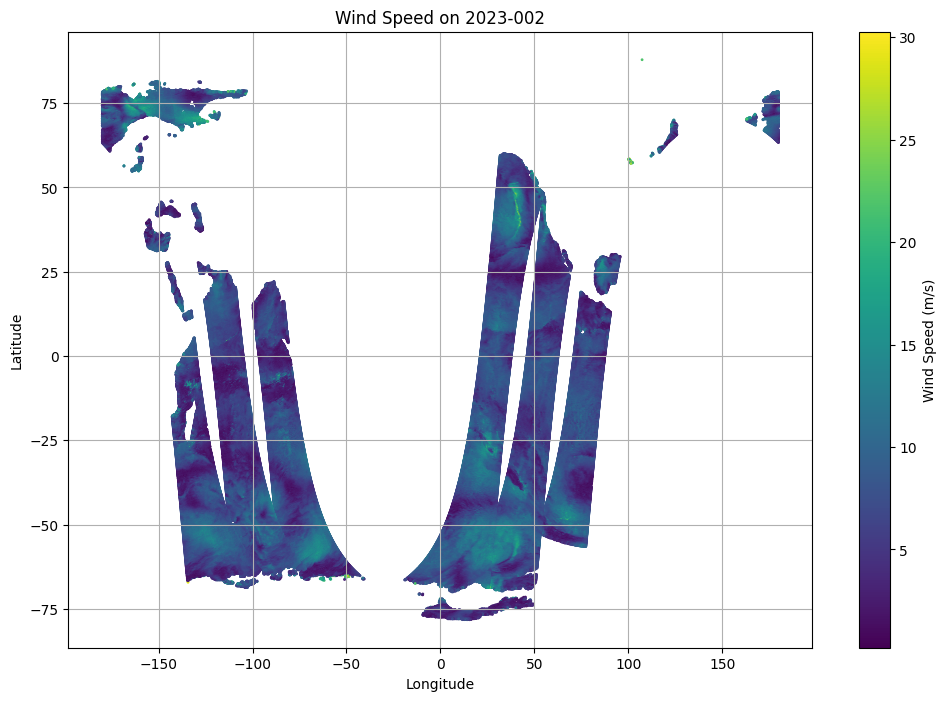

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(combined_lon, combined_lat, c=combined_ws, cmap='viridis', s=1)
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Wind Speed on {year}-{day:03d}')
plt.grid(True)
plt.show()

## Add map features

### Subtask:
Add map features like coastlines, borders, or gridlines to the plot for better context.


**Reasoning**:
Add map features like coastlines, borders, or gridlines to the plot for better context using cartopy.



In [22]:
!pip install cartopy
import cartopy

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

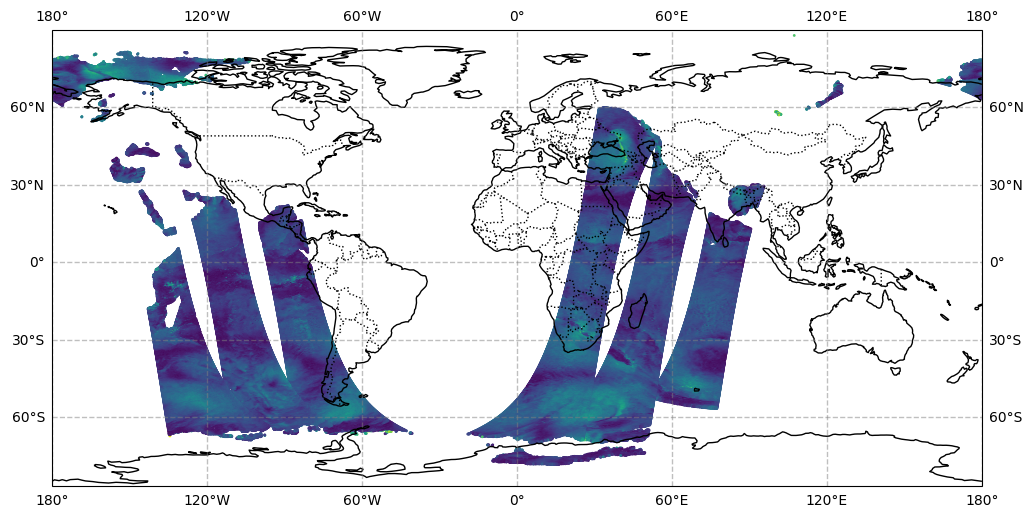

In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.scatter(combined_lon, combined_lat, c=combined_ws, cmap='viridis', s=1, transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.colorbar(label='Wind Speed (m/s)')

# Determine appropriate extent based on data
lon_min, lon_max = np.nanmin(combined_lon), np.nanmax(combined_lon)
lat_min, lat_max = np.nanmin(combined_lat), np.nanmax(combined_lat)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())


plt.title(f'Wind Speed on {year}-{day:03d} with Map Features')
plt.show()

**Reasoning**:
The previous attempt failed because the cartopy library is not installed. Install cartopy using pip.



**Reasoning**:
Now that cartopy is installed, retry adding map features to the plot.



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

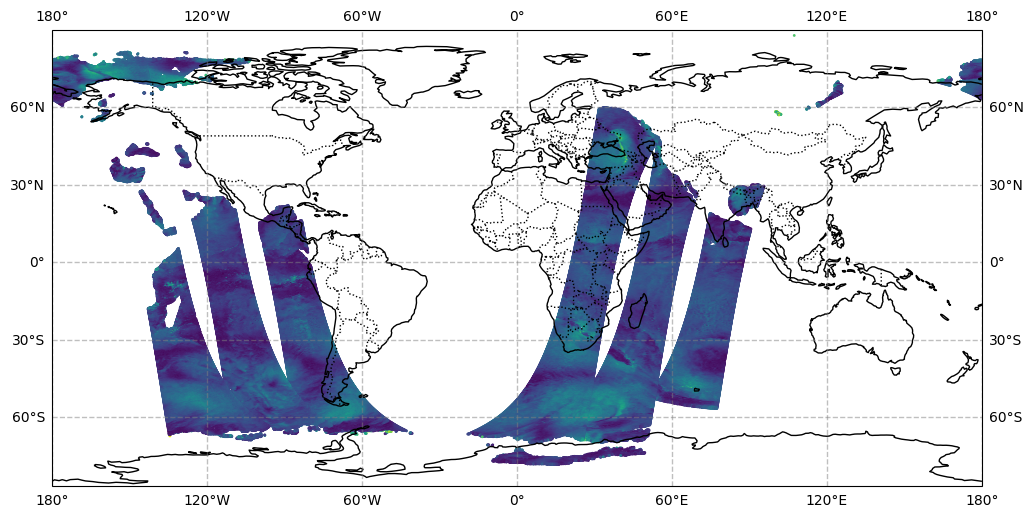

In [24]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.scatter(combined_lon, combined_lat, c=combined_ws, cmap='viridis', s=1, transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.colorbar(label='Wind Speed (m/s)')

# Determine appropriate extent based on data
lon_min, lon_max = np.nanmin(combined_lon), np.nanmax(combined_lon)
lat_min, lat_max = np.nanmin(combined_lat), np.nanmax(combined_lat)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

plt.title(f'Wind Speed on {year}-{day:03d} with Map Features')
plt.show()

**Reasoning**:
The colorbar error indicates that `plt.colorbar()` needs a mappable object. The `ax.scatter()` call returns a mappable object, so we need to capture that and pass it to `plt.colorbar()`.



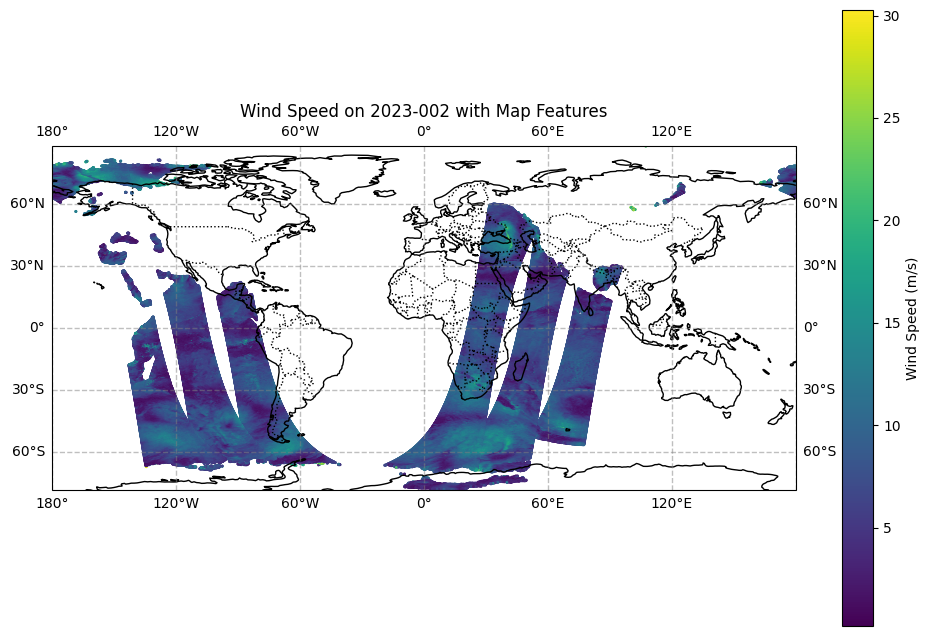

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

scatter_plot = ax.scatter(combined_lon, combined_lat, c=combined_ws, cmap='viridis', s=1, transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.colorbar(scatter_plot, label='Wind Speed (m/s)')

# Determine appropriate extent based on data
lon_min, lon_max = np.nanmin(combined_lon), np.nanmax(combined_lon)
lat_min, lat_max = np.nanmin(combined_lat), np.nanmax(combined_lat)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())


plt.title(f'Wind Speed on {year}-{day:03d} with Map Features')
plt.show()

## Customize plot

### Subtask:
Add a title, color bar, and labels to the plot.


## Display plot

### Subtask:
Display the generated map.


## Summary:

### Data Analysis Key Findings

*   The analysis successfully read data from multiple HDF5 files for a specific day (Year 2023, Day 2).
*   'Longitude', 'Latitude', and 'Wind\_speed\_selection' datasets were extracted and processed, including scaling and filtering based on quality flags.
*   Missing or invalid data points in Longitude, Latitude, and Wind\_speed\_selection were identified and handled by converting them to NaN.
*   Longitude values were adjusted to be in the range of -180 to 180 degrees.
*   The processed data from all files was successfully combined into single NumPy arrays for Longitude, Latitude, and Wind Speed.
*   A geographical scatter plot was generated using the combined data, visualizing wind speed distribution across the geographical coordinates.
*   Map features like coastlines, borders, and gridlines were successfully added to the plot using the `cartopy` library, providing geographical context.
*   A color bar was included to represent the wind speed scale (m/s), and the plot was titled and labeled appropriately.

### Insights or Next Steps

*   Consider implementing more sophisticated data quality checks or outlier detection for the wind speed data.
*   Explore options for handling data from multiple days or a time series analysis of wind speed variations over a period.
